In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import datashader as ds
import datashader.transfer_functions as tf
import datashader.bundling as bd
import matplotlib.pyplot as plt
import colorcet
import matplotlib.colors
import matplotlib.cm
import bokeh.plotting as bpl
import bokeh.transform as btr
import holoviews as hv
import holoviews.operation.datashader as hd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, FactorAnalysis
from scipy.cluster.hierarchy import dendrogram, linkage

# Credit Card Dataset Loading and Overview
Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical) Kredi Kartı hamilinin kimliği (Kategorik)

BALANCE: Balance amount left in their account to make purchases ( Alışveriş yapmak için hesabında kalan bakiye tutarı (

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) Bakiyenin ne sıklıkta güncellendiği, 0 ile 1 arasında puan (1 = sıklıkla güncellenir, 0 = sık güncellenmez)

PURCHASES : Amount of purchases made from account Hesaptan yapılan satın alma miktarı

ONEOFFPURCHASES: Maximum purchase amount done in one-go Tek seferde yapılan maksimum satın alma tutarı

INSTALLMENTSPURCHASES : Amount of purchase done in installment Taksitle yapılan satın alma tutarı

CASHADVANCE: Cash in advance given by the user Kullanıcı tarafından verilen avans nakit

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) Satın almaların ne sıklıkta yapıldığını, 0 ile 1 arasında puan verin (1 = sık satın alınır, 0 = sık satın alınmaz)

ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) Satın almaların tek seferde gerçekleşme sıklığı (1 = sıklıkla satın alınır, 0 = sıklıkla satın alınmaz)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) Taksitli alımların ne sıklıkta yapıldığı (1 = sıklıkla yapılır, 0 = sıklıkla yapılmaz)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid Peşin ödemelerin ne sıklıkta yapıldığı

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced" Peşin Ödeme ile Yapılan İşlem Sayısı

PURCHASESTRX: Numbe of purchase transactions made Yapılan satın alma işlem sayısı

CREDITLIMIT: Limit of Credit Card for user Kullanıcı Kredi Kartı Limiti

PAYMENTS : Amount of Payment done by user Kullanıcı tarafından yapılan Ödeme Tutarı

MINIMUM_PAYMENTS : Minimum amount of payments made by user Kullanıcı tarafından yapılan minimum ödeme tutarı

PRCFULLPAYMENT : Percent of full payment paid by user Kullanıcı tarafından ödenen tam ödeme yüzdesi

TENURE : Tenure of credit card service for user Kullanıcı için kredi kartı hizmeti kullanım süresi



In [2]:
df = pd.read_csv('Downloads/credit.csv') 
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [4]:
df.shape

(8950, 18)

In [5]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

<AxesSubplot:>

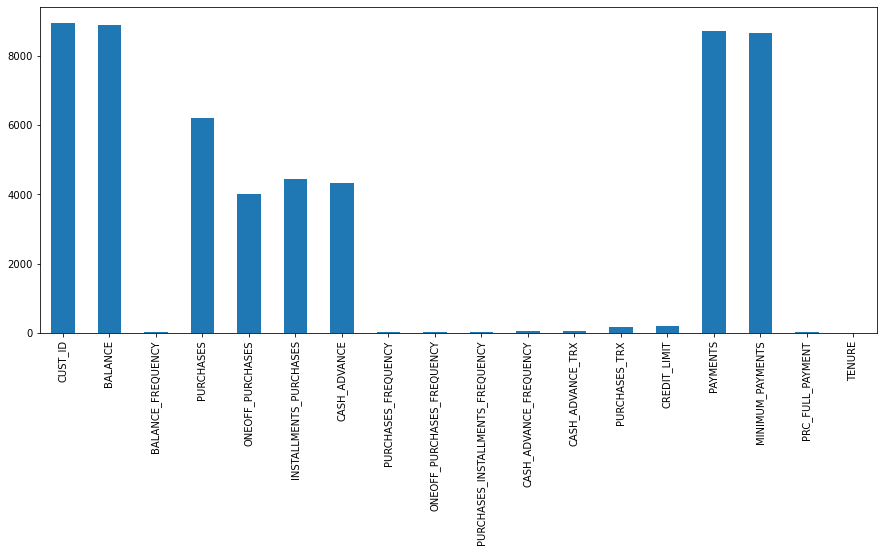

In [7]:
df.nunique().plot(kind='bar', figsize=(15,6))

In [8]:
#yinelenen giriş
df.duplicated().sum()

0

In [9]:
# Dropping any objext related variable
df = df.drop("CUST_ID", axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [10]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

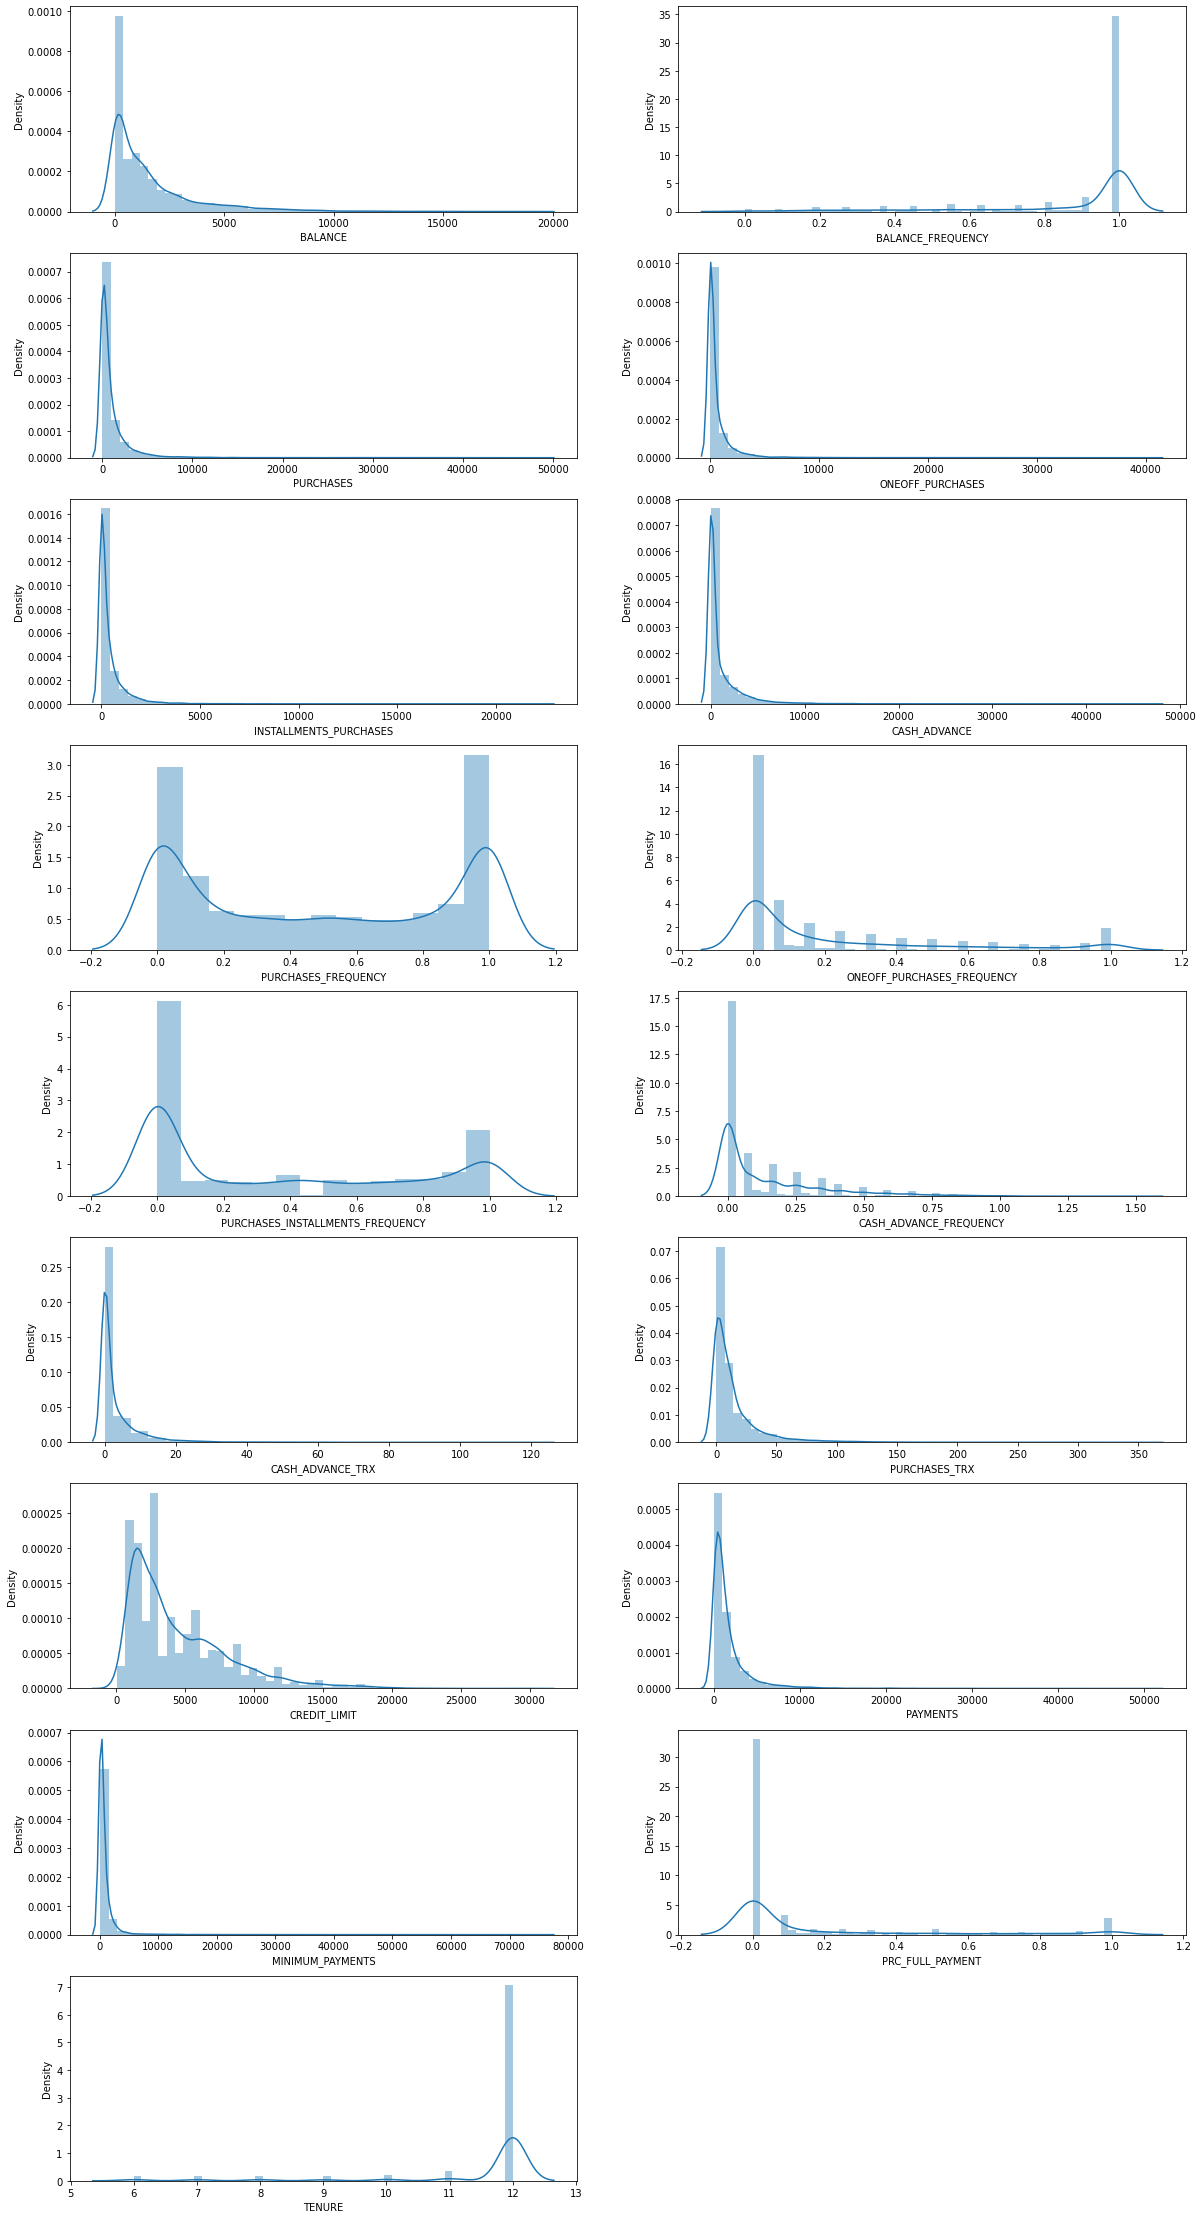

In [11]:
#değişkenlerin dağılımlarına genel bakış
#genelde sola çarpık ve sıfır değeri bol
plt.rcParams['figure.figsize'] =(20,40)

for num in range(0,17):
    ax = plt.subplot(9,2,num+1)
    col = df.columns[num]
    sns.distplot(df[col], ax=ax)
    
plt.savefig('all_dist.png')

In [12]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CASH_ADVANCE_FREQUENCY                0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
TENURE                                0
dtype: int64

In [13]:
# impute with median
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].median()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].median()


In [14]:
df.isnull().sum().sort_values(ascending=False).head()

BALANCE                   0
CASH_ADVANCE_FREQUENCY    0
PRC_FULL_PAYMENT          0
MINIMUM_PAYMENTS          0
PAYMENTS                  0
dtype: int64

In [15]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


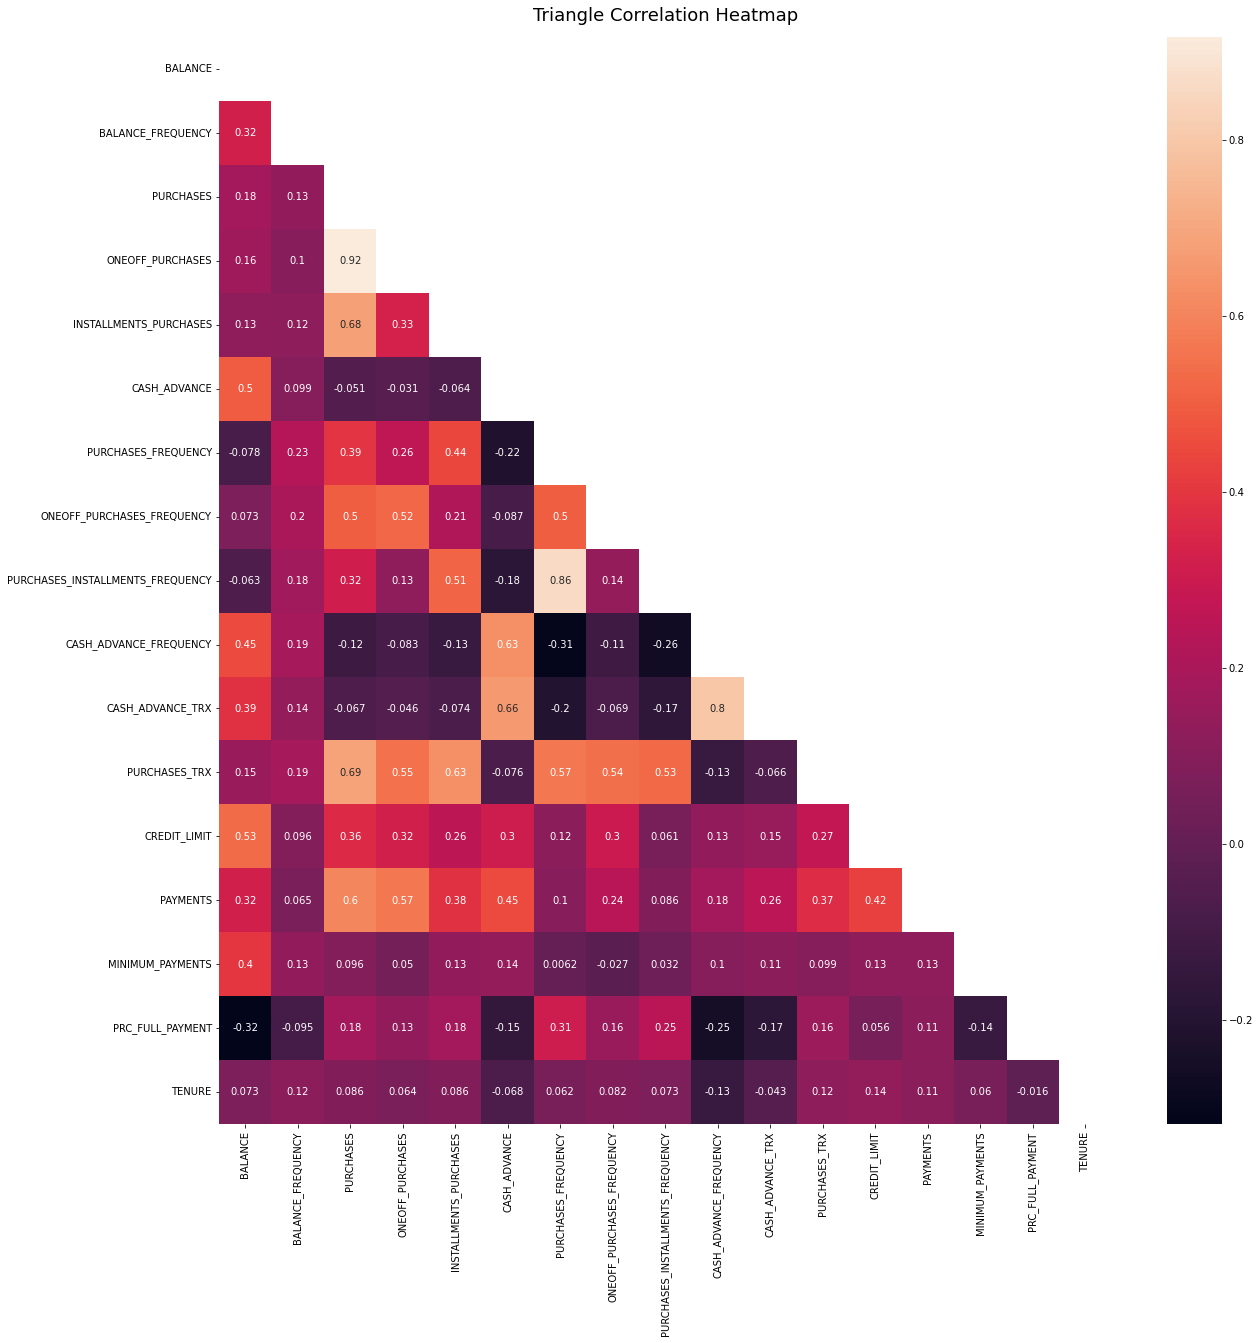

In [16]:
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), annot=True, mask=mask)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

1) Satın almalar, tek seferlik maksimum satın alma tutarıyla güçlü bir şekilde ilişkilidir.

2) Satın almaların tek seferde gerçekleşme sıklığı ve satın alma taksit sıklığı yüksek oranda ilişkilidir.

3) Peşin ödeme ile yapılan işlem sayısı , ne sıklıkla peşin ödeme yapıldığıyla yüksek oranda ilişkilidir.

Pek çok birbiriyle yüksek oranda ilişkili ve dolayısıyla gereksiz özellik olduğundan, PCA'nın gerçekleştirilmesi tavsiye edilir. 

In [64]:
#ölçeklendirme
scale = StandardScaler()
X = scale.fit_transform(df)
df_scale = pd.DataFrame(X)

df_scale.columns = df.columns

In [65]:
df_scale.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


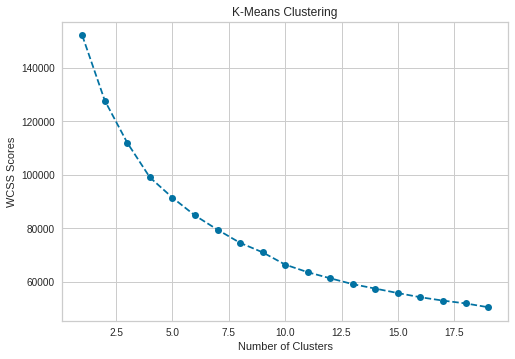

In [79]:
#elbow
from sklearn.cluster import KMeans
wcss = []

for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure()
plt.plot(range(1,20), wcss, marker='o', linestyle='--')
plt.title('K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Scores')
plt.show()

Parameter: {'n_clusters': 4} Score 0.1976911456779212
Parameter: {'n_clusters': 5} Score 0.19327119581091734
Parameter: {'n_clusters': 6} Score 0.20282740915525643
Parameter: {'n_clusters': 7} Score 0.21529568691733653
Parameter: {'n_clusters': 8} Score 0.22168115422528212
Parameter: {'n_clusters': 9} Score 0.21544557892223296


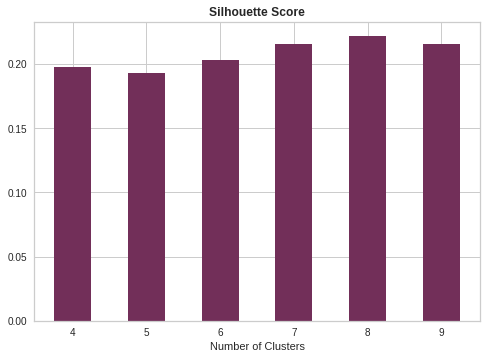

{'n_clusters': 8}


In [80]:
from sklearn.model_selection import ParameterGrid
from yellowbrick.cluster import SilhouetteVisualizer
import sklearn.metrics as metrics

parameters = [4,5,6,7,8, 9]
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()
silhouette_scores = []
for p in parameter_grid:
    kmeans_model.set_params(**p)    
    kmeans_model.fit(X)         
    ss = metrics.silhouette_score(X, kmeans_model.labels_)  
    silhouette_scores += [ss]       
    print('Parameter:', p, 'Score', ss)
    if ss > best_score:
        best_score = ss
        best_grid = p

plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()
print(best_grid)

In [107]:
kmeans = KMeans(n_clusters = best_grid["n_clusters"],random_state=42)
kmeans.fit(X)
y_kmeans=kmeans.fit_predict(X)
labels=kmeans.labels_
labels = pd.DataFrame(labels)
print('Modelimin Silhouette skoru ' + str(best_score))

Modelimin Silhouette skoru 0.22168115422528212


In [108]:

#K-MEANS

kmeans=KMeans(8)
kmeans.fit(X)
y_kmeans=kmeans.fit_predict(X)
labels=kmeans.labels_

In [85]:
clusters=pd.concat([df_scale, pd.DataFrame({'cluster':kmeans.labels_})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,4
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,0
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,2
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068,4
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068,4


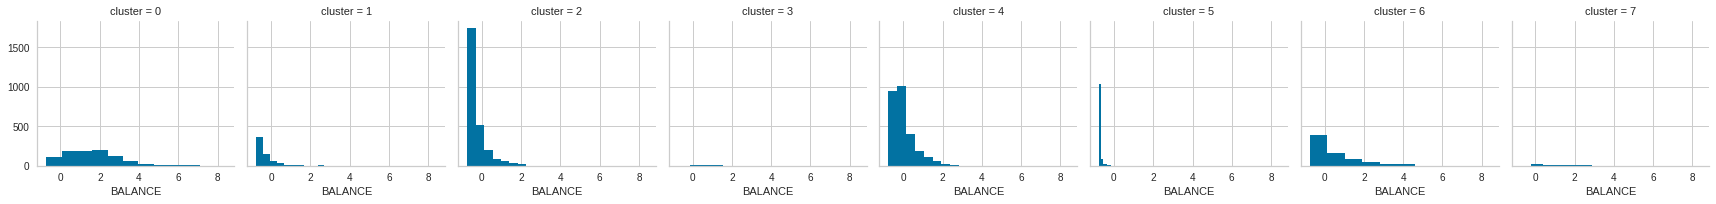

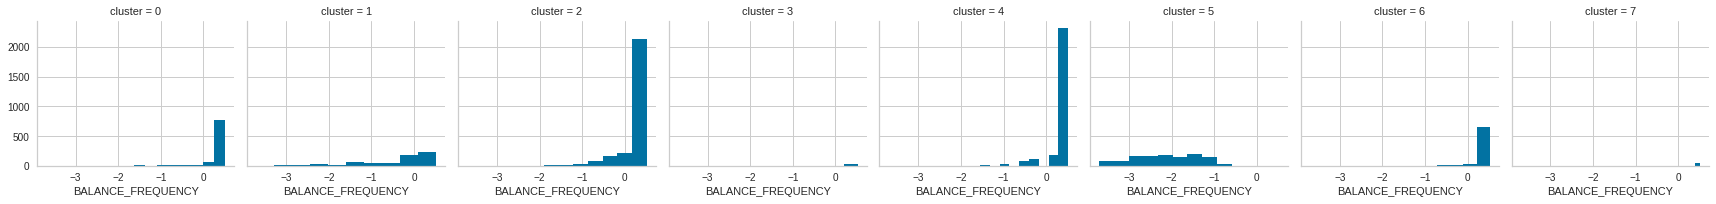

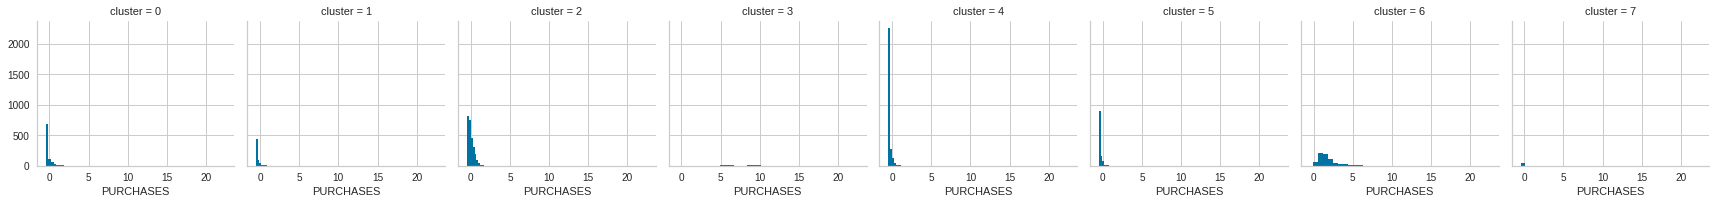

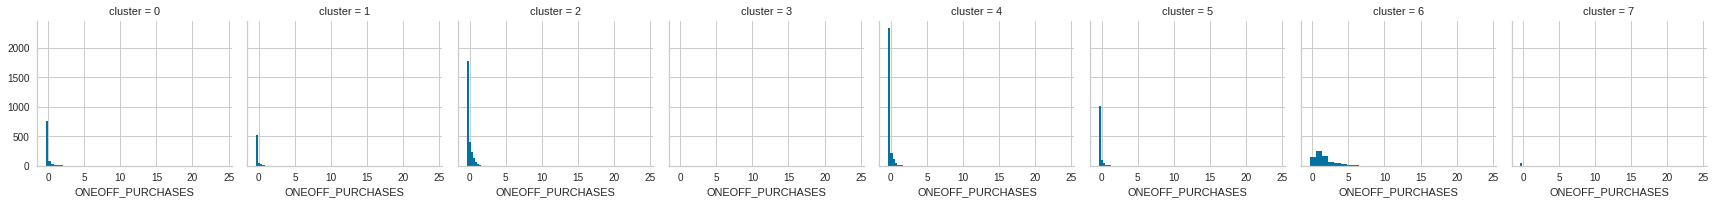

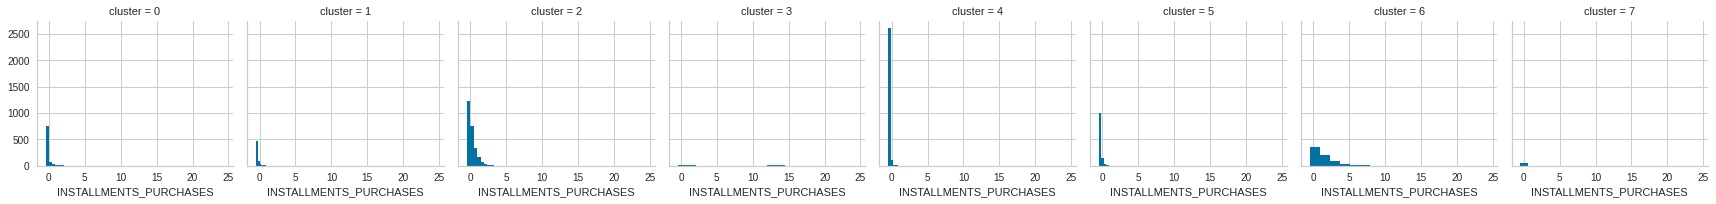

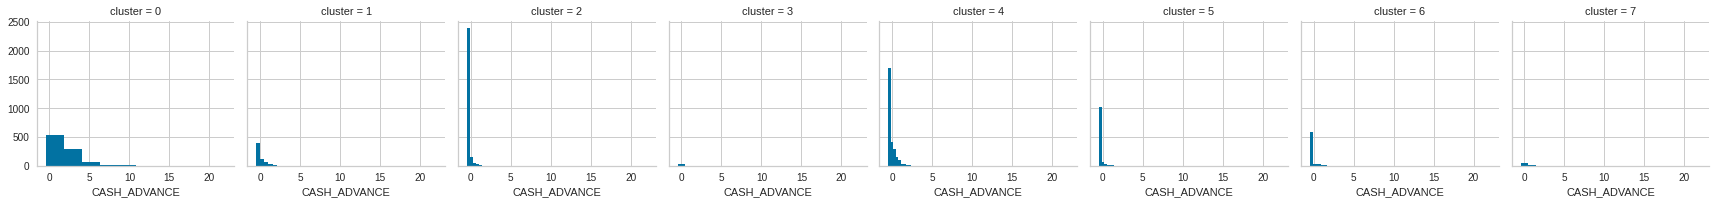

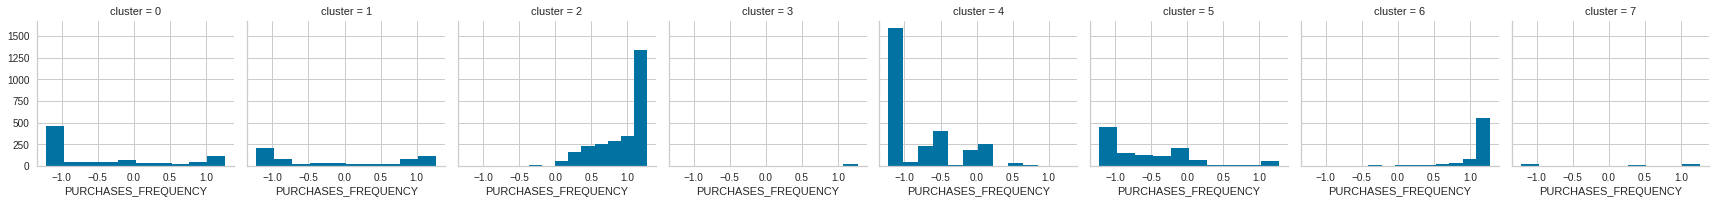

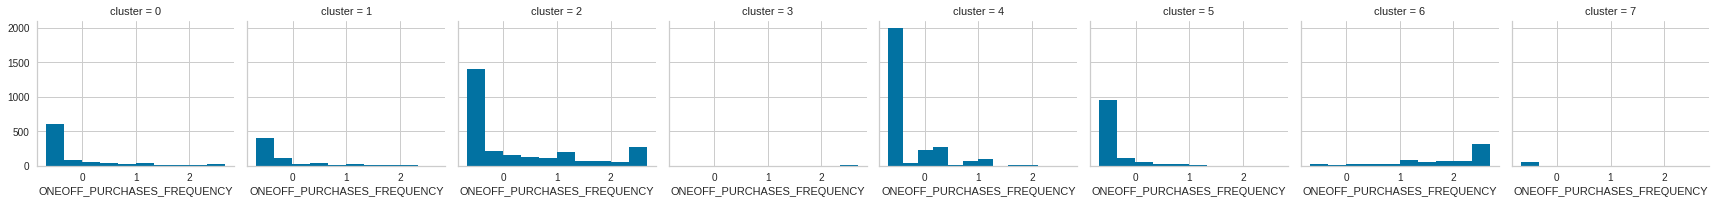

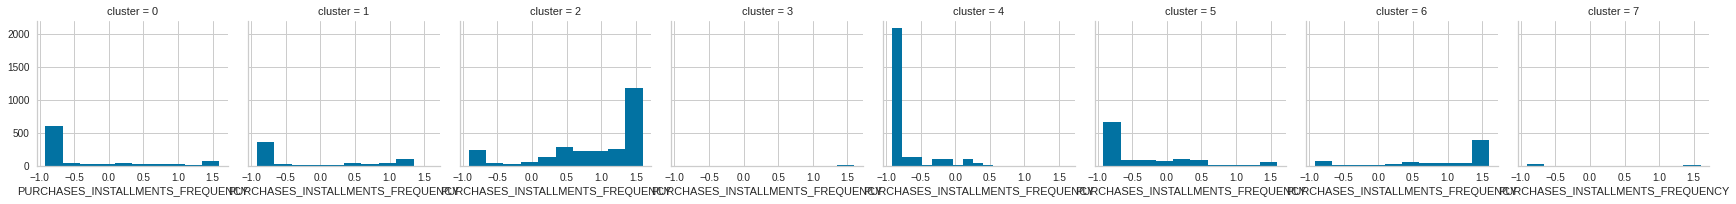

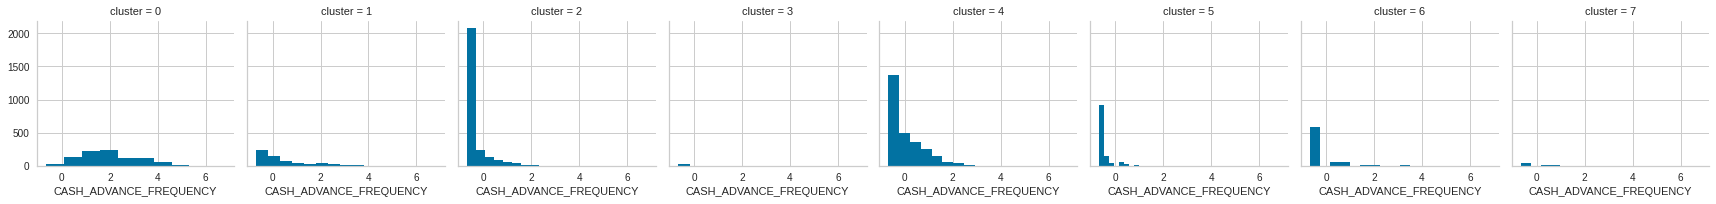

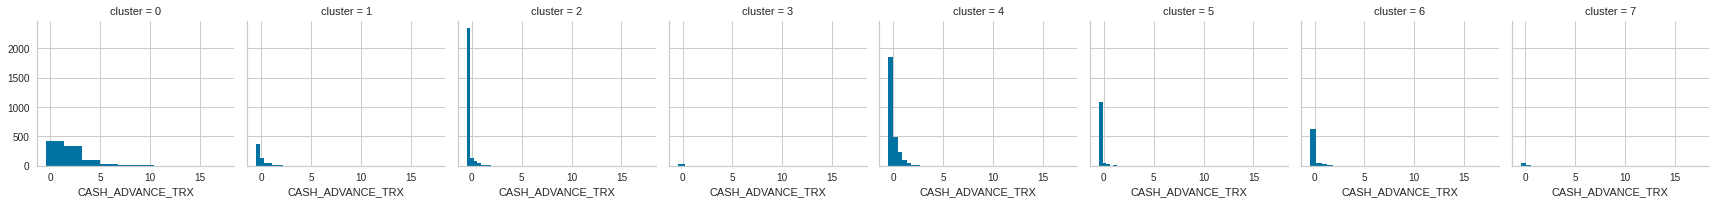

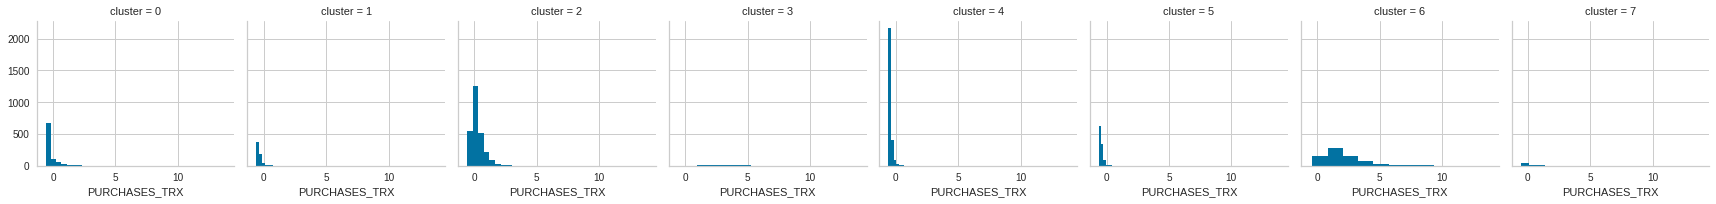

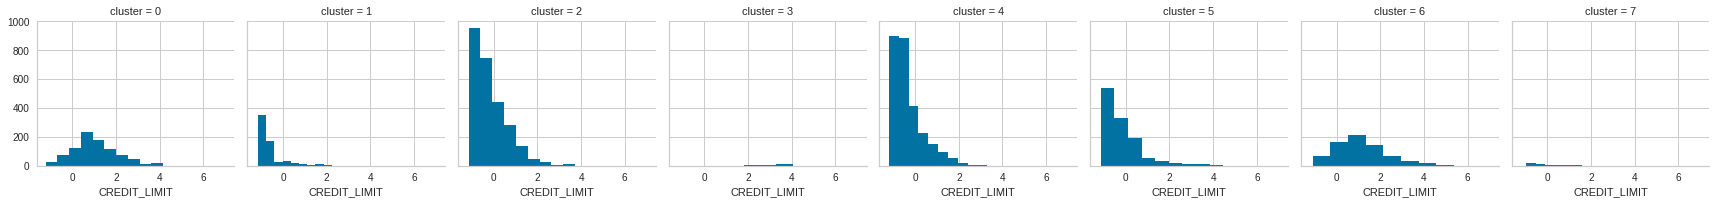

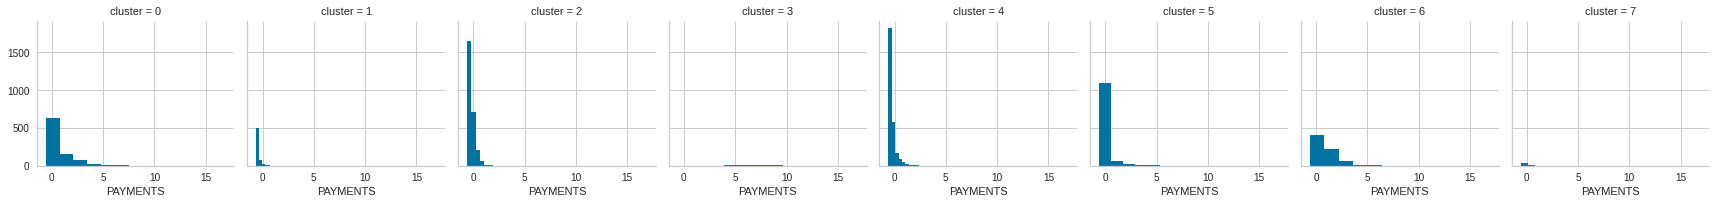

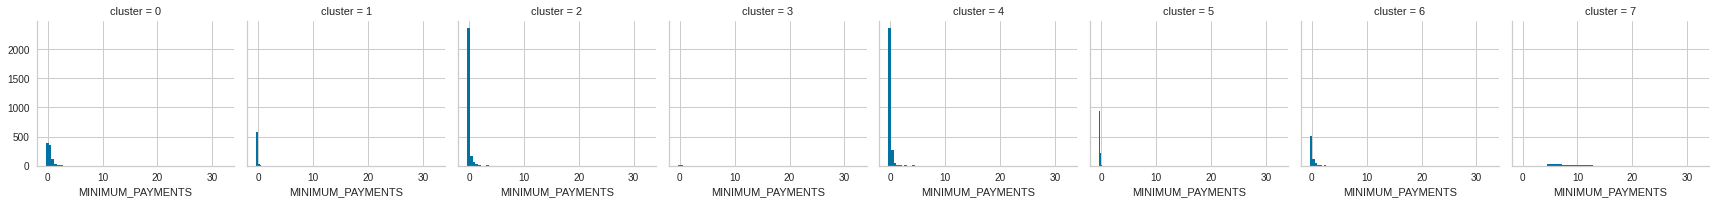

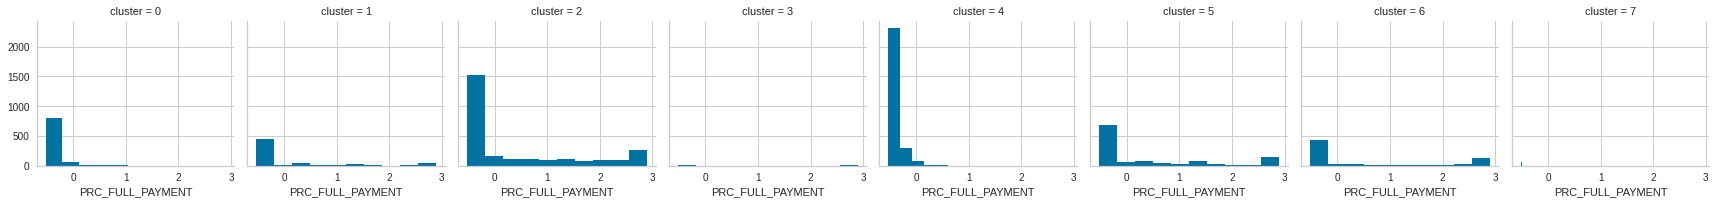

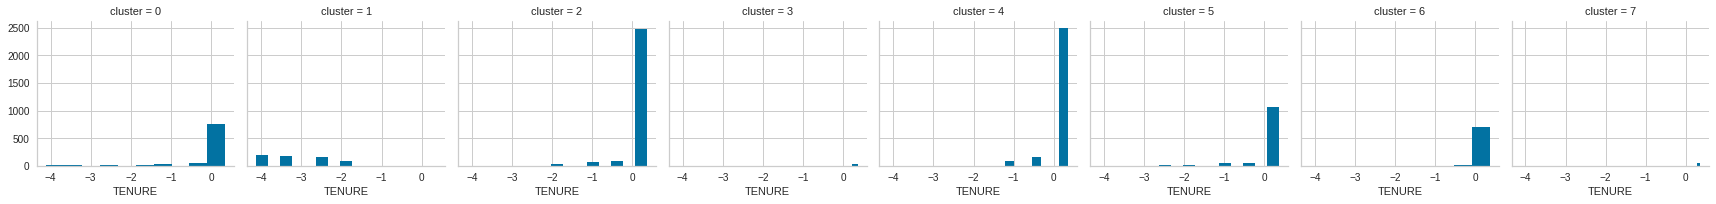

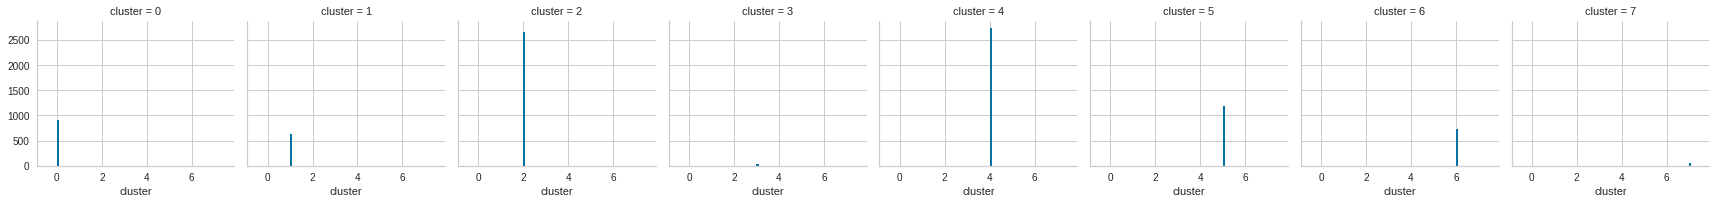

In [86]:
for c in clusters:  
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [87]:
clusters.groupby(['cluster']).mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,1.621012,0.397405,-0.222141,-0.155604,-0.239442,1.970504,-0.469457,-0.184465,-0.422980,1.916969,1.903479,-0.263588,0.994287,0.777570,0.359757,-0.395052,0.068389
1,-0.347278,-0.335777,-0.280396,-0.206989,-0.282366,0.052265,-0.168696,-0.270088,-0.205723,0.288094,-0.009966,-0.378874,-0.565218,-0.390175,-0.214918,0.023253,-3.178142
2,-0.342030,0.353097,0.029202,-0.092583,0.238968,-0.368671,0.978150,0.193035,0.899573,-0.470217,-0.359458,0.227794,-0.148161,-0.182217,-0.122115,0.333559,0.271033
3,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044081,8.098975,1.127533,1.110132,0.310863
4,0.005377,0.402033,-0.346639,-0.226744,-0.402936,-0.107864,-0.833637,-0.361849,-0.762222,0.082767,-0.044096,-0.472304,-0.305034,-0.249213,-0.059203,-0.455072,0.271664
5,-0.701404,-2.140028,-0.306272,-0.230724,-0.300183,-0.321305,-0.539031,-0.438630,-0.427461,-0.522275,-0.377152,-0.415102,-0.173028,-0.189904,-0.284774,0.290636,0.202345
6,0.487727,0.455236,1.769234,1.537219,1.359143,-0.244202,1.152908,1.815353,0.947588,-0.357081,-0.267515,2.068646,1.114001,0.958090,0.090247,0.490797,0.311070
7,1.305315,0.471768,0.058870,-0.222052,0.546328,0.128363,-0.030632,-0.474627,0.169215,-0.093773,0.041859,0.162194,0.013418,0.071241,9.297763,-0.520639,0.296262


In [88]:
print("1.Kümede bulunan müşteri sayısı:" + str(clusters[y_kmeans==0].cluster.count()))
print("2.Kümede bulunan müşteri sayısı:" + str(clusters[y_kmeans==1].cluster.count()))
print("3.Kümede bulunan müşteri sayısı:" + str(clusters[y_kmeans==2].cluster.count()))
print("4.Kümede bulunan müşteri sayısı:" + str(clusters[y_kmeans==3].cluster.count()))
print("5.Kümede bulunan müşteri sayısı:" + str(clusters[y_kmeans==4].cluster.count()))
print("6.Kümede bulunan müşteri sayısı:" + str(clusters[y_kmeans==5].cluster.count()))
print("7.Kümede bulunan müşteri sayısı:" + str(clusters[y_kmeans==6].cluster.count()))
print("8.Kümede bulunan müşteri sayısı:" + str(clusters[y_kmeans==7].cluster.count()))

1.Kümede bulunan müşteri sayısı:905
2.Kümede bulunan müşteri sayısı:636
3.Kümede bulunan müşteri sayısı:2659
4.Kümede bulunan müşteri sayısı:30
5.Kümede bulunan müşteri sayısı:2745
6.Kümede bulunan müşteri sayısı:1194
7.Kümede bulunan müşteri sayısı:723
8.Kümede bulunan müşteri sayısı:58


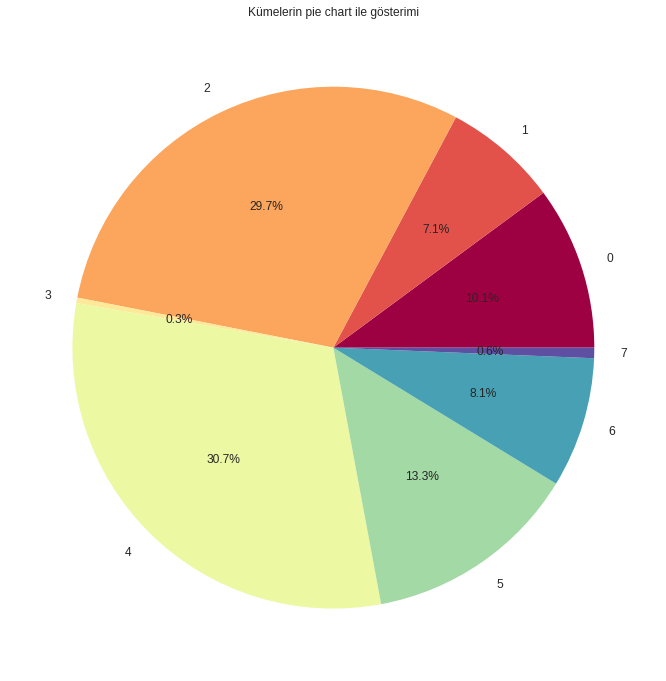

In [89]:
pasta = clusters.groupby([
                clusters['cluster']]).size()
plot = pasta.plot.pie(y='cluster', figsize=(12, 12), 
                      title="Kümelerin pie chart ile gösterimi",
                      autopct='%1.1f%%', ylabel="", colormap="Spectral", fontsize=12)

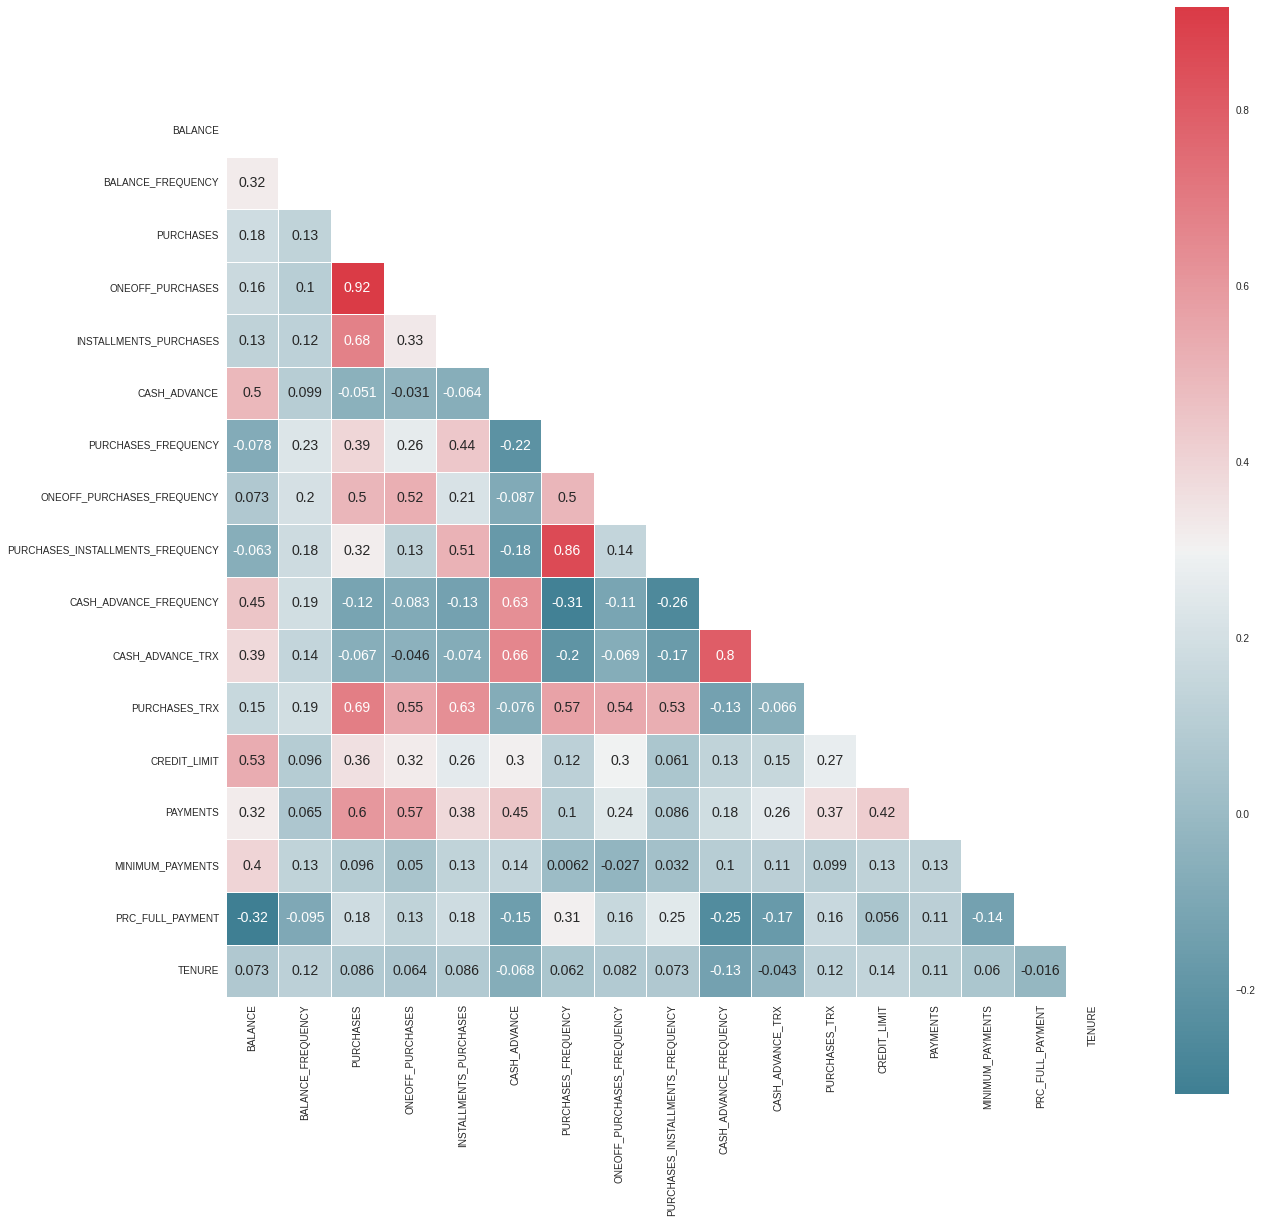

In [90]:
correlation = df_scale.corr(method='pearson')
fig, ax = plt.subplots()
ax.figure.set_size_inches(20, 20)
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, cmap=cmap,mask=mask,  square=True, linewidths=.5, 
            annot=True, annot_kws={'size':14})
plt.show()

In [91]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<AxesSubplot:xlabel='CASH_ADVANCE_TRX', ylabel='CASH_ADVANCE_FREQUENCY'>

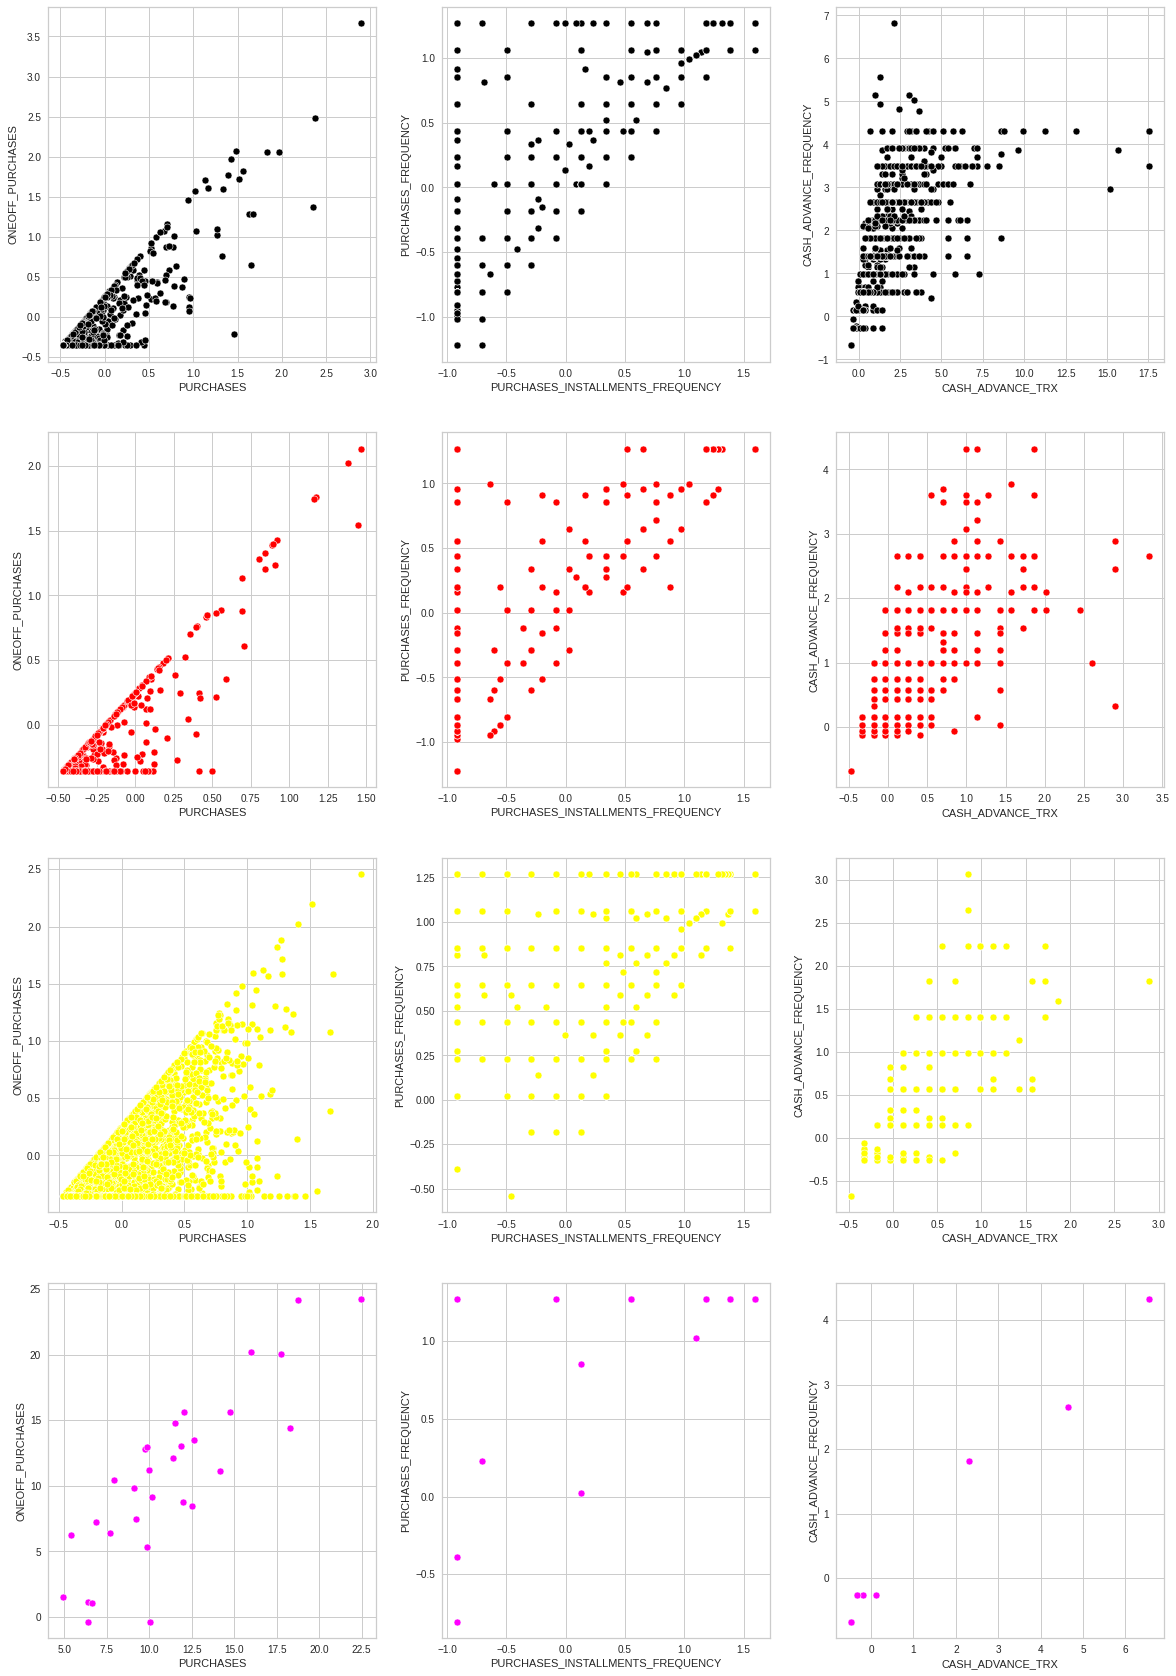

In [92]:
fig, axes = plt.subplots(4,3, figsize=(20, 30))




sns.scatterplot(ax=axes[0, 0],x="PURCHASES", y="ONEOFF_PURCHASES", data=df_scale[y_kmeans==0], color ='black')
sns.scatterplot(ax=axes[0, 1],x="PURCHASES_INSTALLMENTS_FREQUENCY", y="PURCHASES_FREQUENCY", data=df_scale[y_kmeans==0], color ='black')     
sns.scatterplot(ax=axes[0, 2],x="CASH_ADVANCE_TRX", y="CASH_ADVANCE_FREQUENCY", data=df_scale[y_kmeans==0], color ='black')     

sns.scatterplot(ax=axes[1, 0],x="PURCHASES", y="ONEOFF_PURCHASES", data=df_scale[y_kmeans==1], color ='red')
sns.scatterplot(ax=axes[1, 1],x="PURCHASES_INSTALLMENTS_FREQUENCY", y="PURCHASES_FREQUENCY", data=df_scale[y_kmeans==1], color ='red')     
sns.scatterplot(ax=axes[1, 2],x="CASH_ADVANCE_TRX", y="CASH_ADVANCE_FREQUENCY", data=df_scale[y_kmeans==1], color ='red')

sns.scatterplot(ax=axes[2, 0],x="PURCHASES", y="ONEOFF_PURCHASES", data=df_scale[y_kmeans==2], color ='yellow')
sns.scatterplot(ax=axes[2, 1],x="PURCHASES_INSTALLMENTS_FREQUENCY", y="PURCHASES_FREQUENCY", data=df_scale[y_kmeans==2], color ='yellow')     
sns.scatterplot(ax=axes[2, 2],x="CASH_ADVANCE_TRX", y="CASH_ADVANCE_FREQUENCY", data=df_scale[y_kmeans==2], color ='yellow')     

sns.scatterplot(ax=axes[3, 0],x="PURCHASES", y="ONEOFF_PURCHASES", data=df_scale[y_kmeans==3], color ='magenta')
sns.scatterplot(ax=axes[3, 1],x="PURCHASES_INSTALLMENTS_FREQUENCY", y="PURCHASES_FREQUENCY", data=df_scale[y_kmeans==3], color ='magenta')     
sns.scatterplot(ax=axes[3, 2],x="CASH_ADVANCE_TRX", y="CASH_ADVANCE_FREQUENCY", data=df_scale[y_kmeans==3], color ='magenta')   

<AxesSubplot:xlabel='CASH_ADVANCE_TRX', ylabel='CASH_ADVANCE_FREQUENCY'>

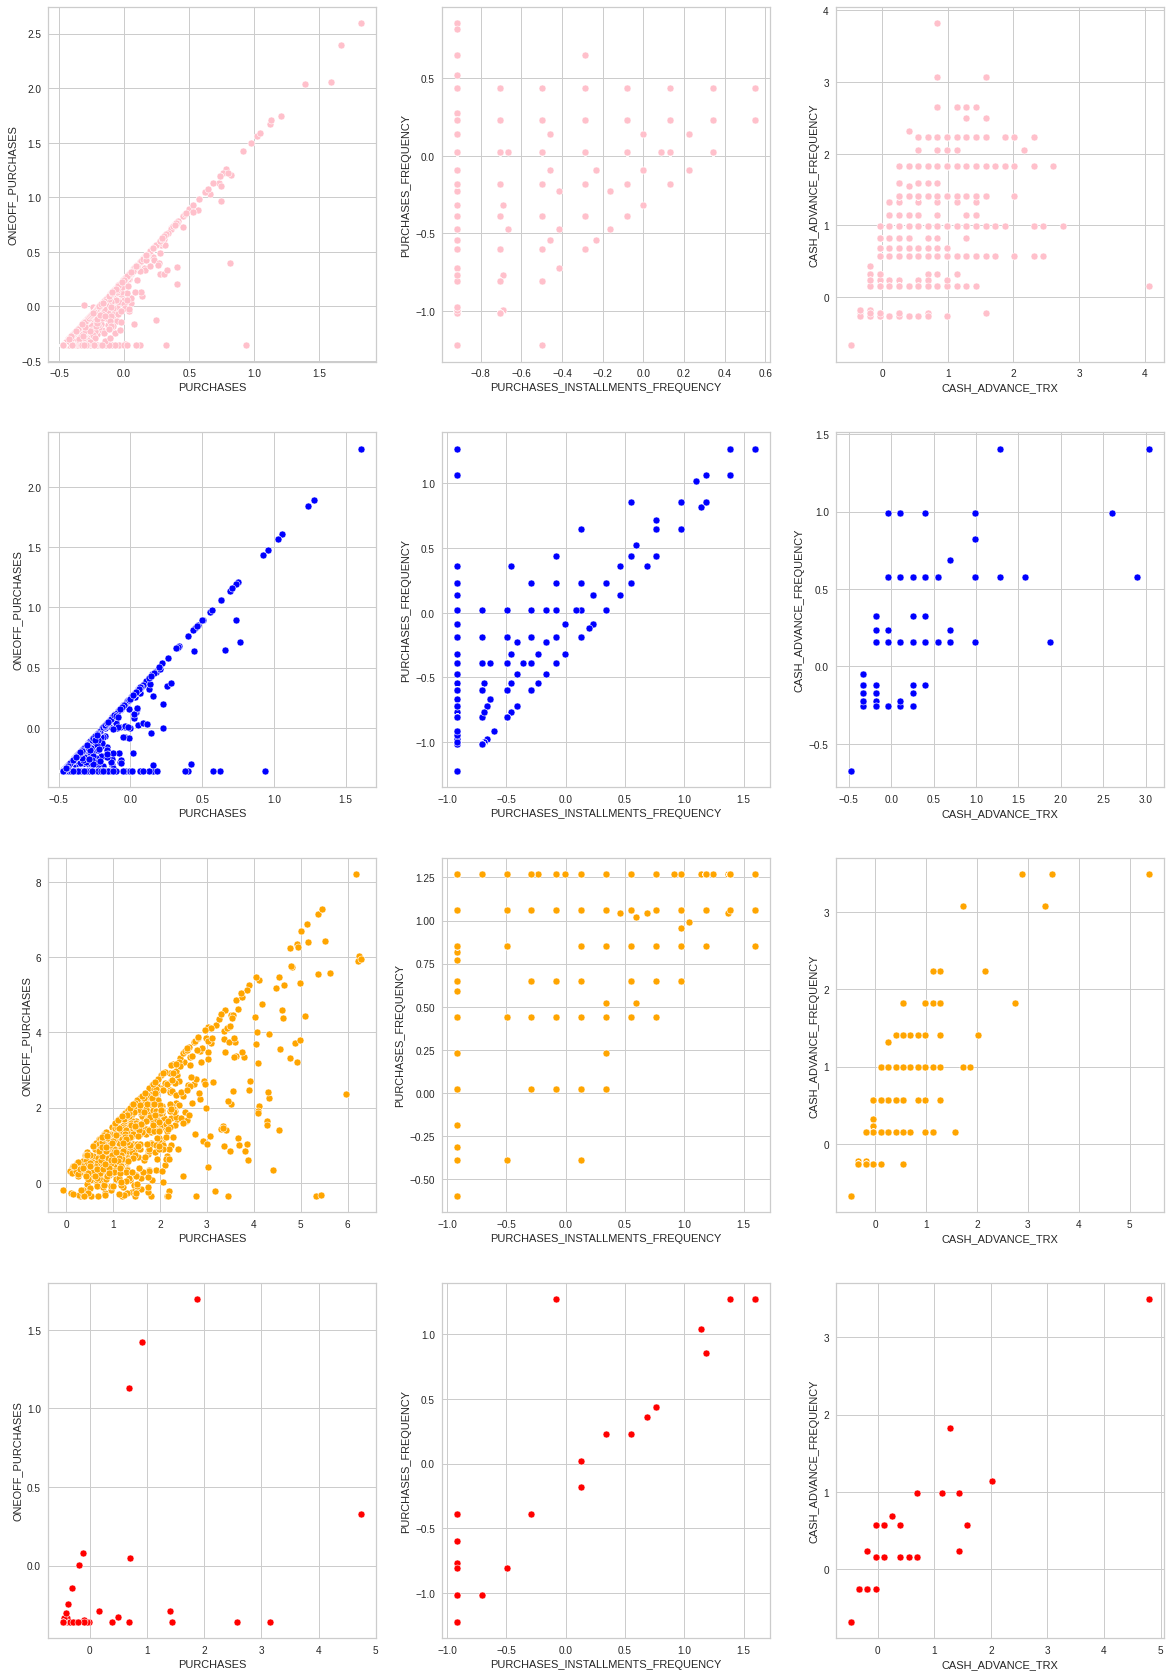

In [93]:
fig, axes = plt.subplots(4,3, figsize=(20, 30))
sns.scatterplot(ax=axes[0, 0],x="PURCHASES", y="ONEOFF_PURCHASES", data=df_scale[y_kmeans==4], color ='pink')
sns.scatterplot(ax=axes[0, 1],x="PURCHASES_INSTALLMENTS_FREQUENCY", y="PURCHASES_FREQUENCY", data=df_scale[y_kmeans==4], color ='pink')     
sns.scatterplot(ax=axes[0, 2],x="CASH_ADVANCE_TRX", y="CASH_ADVANCE_FREQUENCY", data=df_scale[y_kmeans==4], color ='pink')   

sns.scatterplot(ax=axes[1, 0],x="PURCHASES", y="ONEOFF_PURCHASES", data=df_scale[y_kmeans==5], color ='blue')
sns.scatterplot(ax=axes[1, 1],x="PURCHASES_INSTALLMENTS_FREQUENCY", y="PURCHASES_FREQUENCY", data=df_scale[y_kmeans==5], color ='blue')     
sns.scatterplot(ax=axes[1, 2],x="CASH_ADVANCE_TRX", y="CASH_ADVANCE_FREQUENCY", data=df_scale[y_kmeans==5], color ='blue')       

sns.scatterplot(ax=axes[2, 0],x="PURCHASES", y="ONEOFF_PURCHASES", data=df_scale[y_kmeans==6], color ='orange')
sns.scatterplot(ax=axes[2, 1],x="PURCHASES_INSTALLMENTS_FREQUENCY", y="PURCHASES_FREQUENCY", data=df_scale[y_kmeans==6], color ='orange')     
sns.scatterplot(ax=axes[2, 2],x="CASH_ADVANCE_TRX", y="CASH_ADVANCE_FREQUENCY", data=df_scale[y_kmeans==6], color ='orange')    

sns.scatterplot(ax=axes[3, 0],x="PURCHASES", y="ONEOFF_PURCHASES", data=df_scale[y_kmeans==7], color ='red')
sns.scatterplot(ax=axes[3, 1],x="PURCHASES_INSTALLMENTS_FREQUENCY", y="PURCHASES_FREQUENCY", data=df_scale[y_kmeans==7], color ='red')     
sns.scatterplot(ax=axes[3, 2],x="CASH_ADVANCE_TRX", y="CASH_ADVANCE_FREQUENCY", data=df_scale[y_kmeans==7], color ='red')       

# PCA

In [94]:
pca=PCA(n_components=2)
principal_component=pca.fit_transform(X)
principal_component

array([[-1.68365291, -1.07226335],
       [-1.13408845,  2.50911733],
       [ 0.96938709, -0.38360655],
       ...,
       [-0.92899038, -1.80806762],
       [-2.33785226, -0.65362559],
       [-0.55802827, -0.40062558]])

In [110]:

pca_df=pd.DataFrame(data=principal_component, columns=["pca1", "pca2"])
pca_df=pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.683653,-1.072263,1
1,-1.134088,2.509117,2
2,0.969387,-0.383607,0
3,-0.888213,0.004660,1
4,-1.600027,-0.683822,1


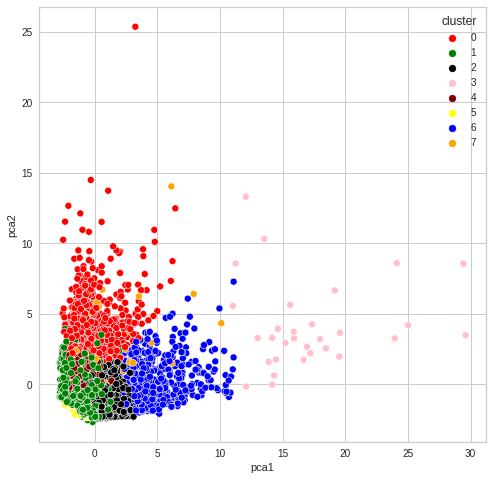

In [102]:
plt.figure(figsize=(8,8))
model=sns.scatterplot(x="pca1", y="pca2", hue="cluster",
                   data=pca_df, 
                   palette=["red","green", "black","pink","maroon","yellow", "blue", "orange"])
plt.show()

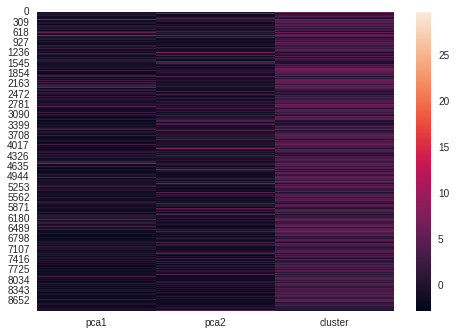

In [106]:

hm = sn.heatmap(data = pca_df)
  

plt.show()